In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import pickle
import random
random.seed(42)
np.random.seed(42)

In [3]:
#with open("../ressources/final_experiments/automode_datasets/df_increasing_size_3000.pickle", "rb") as file:
#with open("../ressources/final_experiments/automode_datasets/df_increasing_size_validate.pickle", "rb") as file:
#with open("../ressources/final_experiments/result_aggregation_exp/llm_evaluated_only_black.pickle", "rb") as file:
#with open("../ressources/automode_bt_evaluated_agg_black_only.pickle", "rb") as file:
with open("../ressources/automode_bt_evaluated_agg_black_llm_foraging.pickle", "rb") as file:
    original_df = pickle.load(file)

In [4]:
original_df["type"] = original_df["parameters"].map(lambda x: type(x.objective_params).__name__)
original_df["original_index"] = original_df.index
original_df["z-scores"] = original_df["scores"].map(lambda x: (x - np.mean(x)) / np.std(x) if x is not None else None)
original_df["coeff_of_var"] = original_df["scores"].map(lambda x: x+abs(np.min(x)) + 1 if x is not None else None).map(lambda x: np.std(x)/np.mean(x) if x is not None else None)


/tmp/ipykernel_61575/3181682175.py:3: RuntimeWarning: invalid value encountered in divide
  original_df["z-scores"] = original_df["scores"].map(lambda x: (x - np.mean(x)) / np.std(x) if x is not None else None)


In [5]:
group_dfs = {category: group.reset_index(drop=True) for category, group in original_df.groupby("type")}

for group, df in group_dfs.items():
    old_size = len(df)
    cleaned = df.dropna()
    new_size = len(cleaned)
    print(f" {group}:  {old_size=} {new_size=}: ratio: {new_size/float(old_size)}")
    group_dfs[group] = cleaned

 Aggregation:  old_size=320 new_size=307: ratio: 0.959375


In [6]:
group_dfs["Aggregation"]

,level_0,index,description,configuration,parameters,argos,behavior_tree,scores,avg_score,type,...,robotstype,target_color,llm_scores,llm_behavior_tree,llm_avg_score,btscores,bt_avg_score,original_index,z-scores,coeff_of_var
0,0,3,The arena has a radius of 1.99 m. In this sett...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 --...,"[0.8, 0.866667, 0.733333, 0.8, 0.866667, 0.6, ...",0.740000,Aggregation,...,CenteredSwarm,black,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 -...,0.000000,"[0.0666667, 0.133333, 0.0666667, 0.0, 0.066666...",0.053333,0,"[0.6923063950813656, 1.4615408511536148, -0.07...",0.037037
2,3,9,The environment consists of a circular arena w...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 --...,"[0.0625, 0.125, 0.0625, 0.125, 0.1875, 0.125, ...",0.112500,Aggregation,...,CenteredSwarm,black,"[0.4375, 0.5, 0.5, 0.4375, 0.5, 0.5, 0.375, 0....",--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 -...,0.437500,"[0.0, 0.0, 0.0625, 0.0625, 0.0, 0.0625, 0.125,...",0.043750,2,"[-1.3333333333333333, 0.3333333333333332, -1.3...",0.031915
3,4,13,"The rectangular space is 1.94 m long, 2.32 m w...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 --...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,Aggregation,...,CenteredSwarm,black,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 -...,0.000000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.111...",0.011111,3,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",0.000000
4,8,32,"The rectangular space is 4.02 m long, 3.31 m w...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 --...,"[0.777778, 0.888889, 0.777778, 0.777778, 0.888...",0.811111,Aggregation,...,CenteredSwarm,black,"[0.666667, 0.555556, 0.555556, 0.444444, 0.555...",--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 -...,0.500000,"[0.111111, 0.444444, 0.222222, 0.222222, 0.333...",0.333333,4,"[-0.46852128566581813, 1.093216333220243, -0.4...",0.028714
6,13,44,"With a radius of 4.25 meters, the circular are...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 --...,"[0.380952, 0.428571, 0.47619, 0.619048, 0.6190...",0.495238,Aggregation,...,CenteredSwarm,black,"[0.380952, 0.380952, 0.333333, 0.47619, 0.4285...",--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 --...,0.433333,"[0.142857, 0.0952381, 0.142857, 0.047619, 0.14...",0.128571,6,"[-1.2939911719463777, -0.754830070701129, -0.2...",0.047074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,660,2527,The environment features a circle composed of ...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 --...,"[0.619048, 0.619048, 0.666667, 0.761905, 0.619...",0.666667,Aggregation,...,CenteredSwarm,black,"[0.238095, 0.142857, 0.428571, 0.285714, 0.238...",--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 -...,0.280952,"[0.142857, 0.142857, 0.047619, 0.142857, 0.095...",0.114286,314,"[-0.9128709291752787, -0.9128709291752787, -2....",0.022822
315,661,2529,"In this setting, a circular arena with a radiu...","<?xml version=""1.00"" ?>\n<config>\n 

In [7]:
group_dfs["Aggregation"].keys()

Index(['level_0', 'index', 'description', 'configuration', 'parameters',
       'argos', 'behavior_tree', 'scores', 'avg_score', 'type', 'lightstype',
       'arenatype', 'robotstype', 'target_color', 'llm_scores',
       'llm_behavior_tree', 'llm_avg_score', 'btscores', 'bt_avg_score',
       'original_index', 'z-scores', 'coeff_of_var'],
      dtype='object')

In [8]:
try:
    print(group_dfs["Foraging"][group_dfs["Foraging"]["avg_score"] > 4000].iloc[0].behavior_tree)
except:
    print("not found")

not found


## Distribution of Scores

/tmp/ipykernel_61575/2231649779.py:45: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.2`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(data=[data_bt, data_llm], split=True, inner='stick', bw=0.2, palette=palette,cut=0)  # Soft coral and light blue


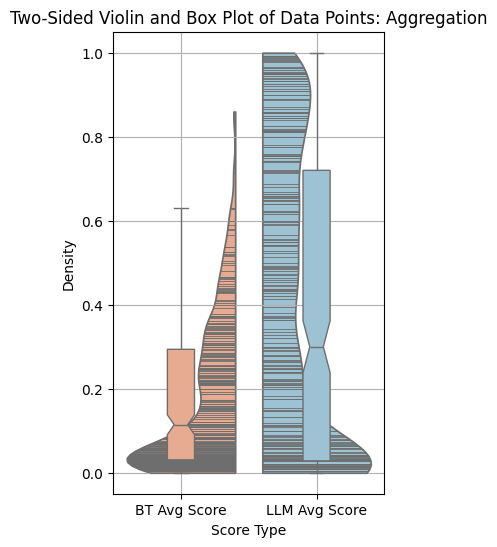

,Dataset,Mean (BT),Median (BT),Min (BT),Max (BT),Mean (LLM),Median (LLM),Min (LLM),Max (LLM)
0,Aggregation,0.179892,0.114286,0.0,0.86,0.388993,0.3,0.0,1.0


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Initialize a list to store the statistics for the table
stats_list = []

# Define the pastel color palette as before
palette = ["#f4a582", "#92c5de"]  # Soft coral and light blue

# Create violin plots and boxplots for each group in the group_dfs dictionary
for group, df in group_dfs.items():
    # Sample data
    data_bt = df.bt_avg_score.to_numpy()  # No clipping of the data itself
    data_llm = df.llm_avg_score.to_numpy()  # No clipping of the data itself
    
    # Calculate statistics for the table
    mean_bt = data_bt.mean()
    median_bt = np.median(data_bt)
    min_bt = data_bt.min()
    max_bt = data_bt.max()
    
    mean_llm = data_llm.mean()
    median_llm = np.median(data_llm)
    min_llm = data_llm.min()
    max_llm = data_llm.max()
    
    stats_list.append({
        'Dataset': group,
        'Mean (BT)': mean_bt,
        'Median (BT)': median_bt,
        'Min (BT)': min_bt,
        'Max (BT)': max_bt,
        'Mean (LLM)': mean_llm,
        'Median (LLM)': median_llm,
        'Min (LLM)': min_llm,
        'Max (LLM)': max_llm
    })
    
    # Create the plot
    plt.figure(figsize=(3.5, 6))
    
    # Use pastel colors with the desired combination
    sns.violinplot(data=[data_bt, data_llm], split=True, inner='stick', bw=0.2, palette=palette,cut=0)  # Soft coral and light blue
    
    # Overlay the boxplot with matching colors
    sns.boxplot(data=[data_bt, data_llm], width=0.2, fliersize=0, notch=True, palette=palette)
    
    # Set the Y-axis limits to cap the KDE (violin) at 0 and 1
    #plt.ylim(0, 1)
    
    plt.title(f"Two-Sided Violin and Box Plot of Data Points: {group}")
    plt.xlabel('Score Type')
    plt.ylabel('Density')
    plt.xticks([0, 1], ['BT Avg Score', 'LLM Avg Score'])
    plt.grid(True)
    plt.show()

# Create the statistics table
stats_df = pd.DataFrame(stats_list)
display(stats_df)


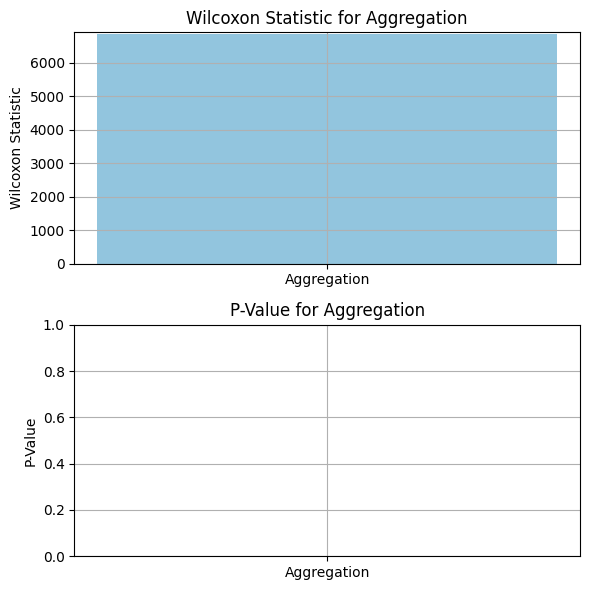

       Dataset  Wilcoxon Statistic       P-Value
0  Aggregation              6850.5  2.255001e-25


In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import wilcoxon

# Initialize a list to store the statistics for the table
stats_list = []

# Create the Wilcoxon test results plot for each group in the group_dfs dictionary
for group, df in group_dfs.items():
    # Sample data
    data_bt = df.bt_avg_score.to_numpy()  # No clipping of the data itself
    data_llm = df.llm_avg_score.to_numpy()  # No clipping of the data itself
    
    # Compute two-sided Wilcoxon signed-rank test to compare LLM vs BT
    stat, p_value = wilcoxon(data_bt, data_llm)
    
    # Store results in stats list
    stats_list.append({
        'Dataset': group,
        'Wilcoxon Statistic': stat,
        'P-Value': p_value
    })
    
    # Plot the Wilcoxon test result for each group
    fig, ax = plt.subplots(2, 1, figsize=(6, 6))

    # Plot Wilcoxon Statistic
    ax[0].bar(group, stat, color='#92c5de')
    ax[0].set_title(f"Wilcoxon Statistic for {group}")
    ax[0].set_ylabel('Wilcoxon Statistic')
    ax[0].set_ylim(0, max(stat, 1) + 50)  # Adjust y-axis to fit the statistic
    ax[0].grid(True)

    # Plot P-Value
    ax[1].bar(group, p_value, color='#f4a582')
    ax[1].set_title(f"P-Value for {group}")
    ax[1].set_ylabel('P-Value')
    ax[1].set_ylim(0, 1)  # P-value is between 0 and 1
    ax[1].grid(True)

    plt.tight_layout()
    plt.show()

# Create the statistics table
stats_df = pd.DataFrame(stats_list)
print(stats_df)


In [11]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def compare_methods(df, score_col_1, score_col_2, method_A, method_B):
    # Separate scores for each method
    scores_A = df[df['Dataset'] == method_A][score_col_1]
    scores_B = df[df['Dataset'] == method_B][score_col_2]

    # Calculate means and standard deviations
    mean_A = scores_A.mean()
    mean_B = scores_B.mean()
    std_A = scores_A.std(ddof=1)  # Sample standard deviation
    std_B = scores_B.std(ddof=1)  # Sample standard deviation
    n_A = len(scores_A)
    n_B = len(scores_B)

    # Calculate pooled standard deviation
    SD_pooled = np.sqrt(((n_A - 1) * std_A**2 + (n_B - 1) * std_B**2) / (n_A + n_B - 2))

    # Calculate Cohen's d
    cohens_d = (mean_B - mean_A) / SD_pooled if SD_pooled != 0 else np.nan

    # Perform t-test
    t_stat, p_value = stats.ttest_ind(scores_A, scores_B, alternative='greater') # greater less or two-sided
    
    # method A will be llms method B will be automode
    # null hypothesis: method A is worse than method B     
    # alternative hypothesis: method A is eq or better than method B
    stat, pval = stats.wilcoxon(scores_A, scores_B, alternative="greater")

    # Prepare results
    results = {
        'Mean Score of A': mean_A.item(),
        'Mean Score of B': mean_B.item(),
        'Mean Difference': (mean_B - mean_A).item(),
        'T-statistic': t_stat.item(),
        'P-value': p_value.item(),
        'Cohen\'s d': cohens_d.item(),
        'Wilcoxon Statistic': stat.item(),
        'Wilcoxon P-value': pval.item()
    }

    return results


# Example use case for the Aggregation dataset
df = group_dfs["Aggregation"]  # Assuming your dataframe is stored like this
results = compare_methods(df, 'llm_avg_score', 'bt_avg_score', 'llm_evaluated_only_white.pickle', 'bt_avg_score')

print(results)

# Now, let's create the violin plot
plt.figure(figsize=(10, 6))

sns.violinplot(x="Dataset", y="Score", hue="Dataset", data=df_combined_melted, split=True, inner="stick",
               palette="muted", linewidth=0.5)

plt.title("Comparison of LLM and AutoMoDe Scores")
plt.xlabel('Score Type')
plt.ylabel('Score Value')

plt.show()


KeyError: 'Dataset'